PM2.5 is also known as fine particulate matter, which has a diameter of less than 2.5 microns. It has been previously shown to have both long and short term health effects on humans. Within BC, the PM2.5 concentration is very low during the winter months. However, during the summers, the province often sees heightened concentration due to PM2.5 emitted from wildfires that originated within the province or transported from the United States. 

In [301]:
import pandas as pd

# Data downloaded from https://envistaweb.env.gov.bc.ca/
# This is data taken at Vancouver International Airport #2
pm25 = pd.read_csv('StationData.csv')
pm25.head(5)
## remove the first column and first row

,Station:Vancouver International Airport #2 -,Date Time,CO,NO,NO2,O3,PM25,SO2,PM10,WSPD_SCLR,WDIR_SCLR,WSPD_VECT,WDIR_VECT,TEMP_MEAN,ATM_PRESS_1HR,HUMIDITY,RAD_TOTAL,PRECIP_TOTAL,NOx
0,,,ppm,ppb,ppb,ppb,ug/m3,ppb,ug/m3,m/s,Deg.,m/s,Deg.,°C,kPa,% RH,W/M**2,mm,ppb
1,,12/31/2019 24:00 AM,0.29,1.1,18.7,10.5,6.8,0.0,7.0,7.29,92.1,2.59,122.8,8.3,99.9,79.7,0.0,0.0,19.8
2,,1/1/2020 1:00 AM,0.12,0.1,1.9,36.7,0.7,0.3,3.4,4.36,209.3,4.28,209.5,10.6,99.9,78.7,0.0,0.0,2.1
3,,1/1/2020 2:00 AM,0.11,0.1,1.4,38.0,0.8,0.3,0.9,5.55,215.5,5.47,215.6,10.6,99.9,79.7,0.0,0.0,1.5
4,,1/1/2020 3:00 AM,0.11,0.1,1.7,38.3,1.0,0.3,3.5,4.24,221.7,4.15,221.2,10.0,100.0,78.8,0.0,0.4,1.8


In [302]:
pm25.tail(10)
### Need to remove rows 8786-8793s
pm25 = pm25.iloc[1:, 1:] # removing first row and first column
pm25.columns = pm25.columns.str.replace(" ", "")
pm25 = pm25.iloc[:-8, :] # removing last 8 rows
pm25.head()

,DateTime,CO,NO,NO2,O3,PM25,SO2,PM10,WSPD_SCLR,WDIR_SCLR,WSPD_VECT,WDIR_VECT,TEMP_MEAN,ATM_PRESS_1HR,HUMIDITY,RAD_TOTAL,PRECIP_TOTAL,NOx
1,12/31/2019 24:00 AM,0.29,1.1,18.7,10.5,6.8,0.0,7.0,7.29,92.1,2.59,122.8,8.3,99.9,79.7,0.0,0.0,19.8
2,1/1/2020 1:00 AM,0.12,0.1,1.9,36.7,0.7,0.3,3.4,4.36,209.3,4.28,209.5,10.6,99.9,78.7,0.0,0.0,2.1
3,1/1/2020 2:00 AM,0.11,0.1,1.4,38.0,0.8,0.3,0.9,5.55,215.5,5.47,215.6,10.6,99.9,79.7,0.0,0.0,1.5
4,1/1/2020 3:00 AM,0.11,0.1,1.7,38.3,1.0,0.3,3.5,4.24,221.7,4.15,221.2,10.0,100.0,78.8,0.0,0.4,1.8
5,1/1/2020 4:00 AM,0.11,0.1,2.1,39.3,1.1,0.4,2.2,2.72,280.5,2.57,277.8,9.1,100.0,82.0,0.0,0.0,2.1


In [303]:
pm25.iloc[1,1]

' 0.12     '

There are whitespaces in all rows because they are string so I will need to strip whitespace in all row

In [304]:
pm25.dtypes
pm25 = pm25.apply(lambda x: x.str.strip() if x.dtype == "object" else x) ## strip whitespace in all rows

I need to reformat the time in DateTime since it's using a combination of 24-hour and 12-hour clock. I need to change 24 AM to 12 AM. Then I will convert DateTime from type object to DateTime object

In [305]:
pm25['DateTime'] = pm25['DateTime'].str.replace(':00', "")
pm25.head()
pm25['DateTime'] = pm25['DateTime'].str.replace('24 AM', "12 AM")
pm25['DateTime'][0:26]

1     12/31/2019 12 AM
2        1/1/2020 1 AM
3        1/1/2020 2 AM
4        1/1/2020 3 AM
5        1/1/2020 4 AM
6        1/1/2020 5 AM
7        1/1/2020 6 AM
8        1/1/2020 7 AM
9        1/1/2020 8 AM
10       1/1/2020 9 AM
11      1/1/2020 10 AM
12      1/1/2020 11 AM
13      1/1/2020 12 PM
14       1/1/2020 1 PM
15       1/1/2020 2 PM
16       1/1/2020 3 PM
17       1/1/2020 4 PM
18       1/1/2020 5 PM
19       1/1/2020 6 PM
20       1/1/2020 7 PM
21       1/1/2020 8 PM
22       1/1/2020 9 PM
23      1/1/2020 10 PM
24      1/1/2020 11 PM
25      1/1/2020 12 AM
26       1/2/2020 1 AM
Name: DateTime, dtype: object

In [307]:
pm25['DateTime'] = pd.to_datetime(pm25['DateTime'], format="%m/%d/%Y %I %p")

Then convert all other rows into numeric

In [311]:
pm25.iloc[:, 1:] = pm25.iloc[:, 1:].apply(pd.to_numeric)
pm25.reset_index(drop=True, inplace =True)
pm25.dtypes

DateTime         datetime64[ns]
CO                      float64
NO                      float64
NO2                     float64
O3                      float64
PM25                    float64
SO2                     float64
PM10                    float64
WSPD_SCLR               float64
WDIR_SCLR               float64
WSPD_VECT               float64
WDIR_VECT               float64
TEMP_MEAN               float64
ATM_PRESS_1HR           float64
HUMIDITY                float64
RAD_TOTAL               float64
PRECIP_TOTAL            float64
NOx                     float64
dtype: object

Then I plot the time series of PM2.5 since it's the variable that I want to predict

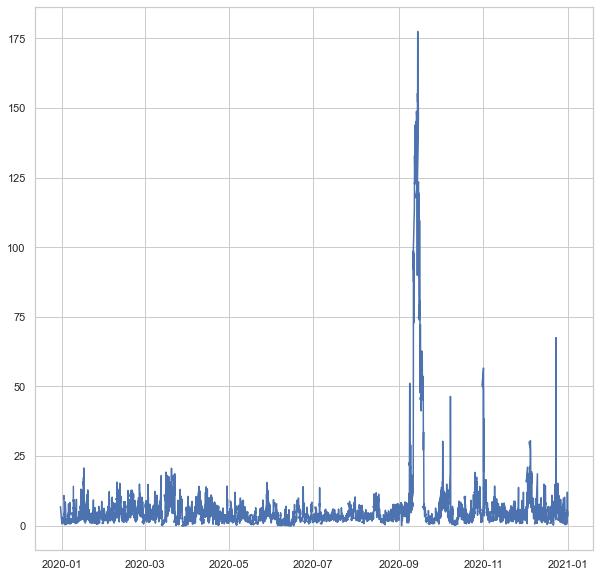

In [313]:
import matplotlib.pyplot as plt
dates = pm25['DateTime']
plt.plot(dates, pm25['PM25']) ### plot timeseries - there's a peak of episode in early September

Looking at the the pattern, seems like month might play a role as summers tend to have wildfires which contribute to PM2.5 concentration. Thus, I will add month as a column to the data frame. Then I remove any NA values and look at the summary statistics. I will reset index since I was dropping rows before

In [316]:
pm25['month'] = pd.DatetimeIndex(pm25['DateTime']).month
pm25 = pm25.dropna()
pm25.describe()
pm25 = pm25.reset_index()

In [274]:
import numpy as np

# Prepping arrays for training and testing
#response_var are the values we want to predict

response_var = np.array(pm25['PM25'])

df_of_predictors = pm25.drop(['DateTime', 'PM25'], axis = 1)

predictors_list = pm25.drop(['DateTime', 'PM25'], axis = 1)
predictors_list = list(predictors_list.columns)

### conver to np array
predictors_array = np.array(df_of_predictors)
predictors_array

In [275]:
from sklearn.model_selection import train_test_split

train_idx, test_idx, train_response_var, test_response_var = train_test_split(pm25.index, response_var, test_size = 0.25, random_state = 42)
train_predictors = predictors_array[train_idx]
test_predicts = predictors_array[test_idx]


In [276]:
print('Training predictors shape:', train_predictors.shape)
print('Training labels shape:', train_response_var.shape)
print('Testing predictors Shape:', test_predictors.shape)
print('Testing Labels Shape:', test_response_var.shape)

Training predictors shape: (6249, 17)
Training labels shape: (6249,)
Testing predictors Shape: (2084,)
Testing Labels Shape: (2084,)


In [277]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_predictors, train_response_var)

RandomForestRegressor(n_estimators=1000, random_state=42)

<BarContainer object of 17 artists>

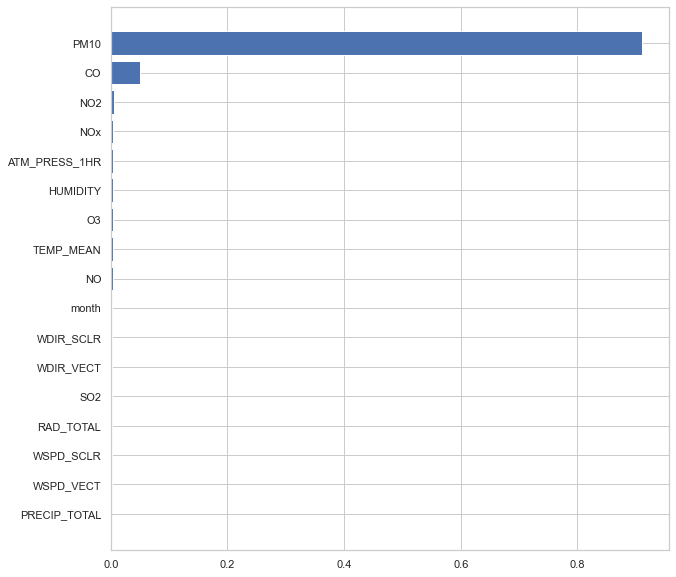

In [278]:
sorted_idx = rf.feature_importances_.argsort()
predictors_list = np.array(predictors_list)
plt.barh(predictors_list[sorted_idx], rf.feature_importances_[sorted_idx])
## Plot of variable of importance

From the plot of variable importance, PM10 is a major predictor which makes sense because when there are extreme smoke events, both PM2.5 and PM10 are emitted. 

In [279]:
predictions = rf.predict(test_predicts)## get predictions

In [280]:
from sklearn import metrics
mae = metrics.mean_absolute_error(test_response_var, predictions)
rmse = metrics.mean_squared_error(test_response_var, predictions)
r2 = metrics.r2_score(test_response_var, predictions)
print('MAE: ', mae)
print('RMSE: ', rmse) ### a lot of large errors
print('R^2: ', r2) ### 


MAE:  1.5225612284069112
RMSE:  9.35553910877159
R^2:  0.9545032388689879


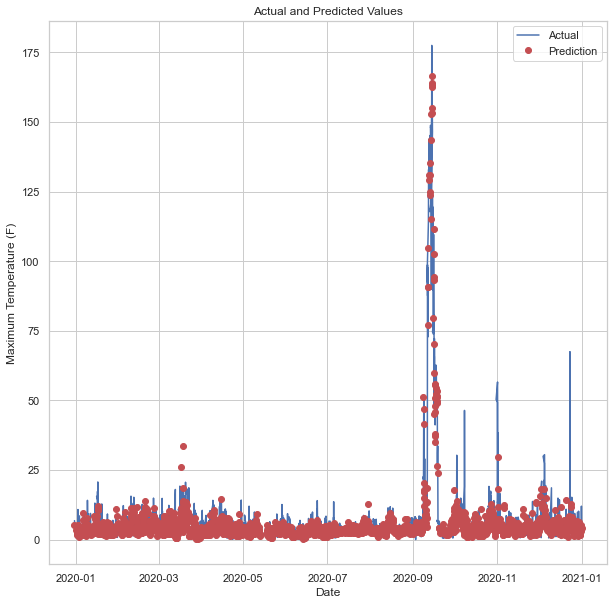

In [281]:
import datetime
actual_df = pd.DataFrame(data = {'date': pm25['DateTime'],
                                'true_val': pm25['PM25']})
pred_df = pd.DataFrame(data = {'date': pm25['DateTime'][test_idx],
                                'pred': predictions_w_month})
plt.rcParams['figure.figsize'] = [10, 10]
plt.plot(actual_df['date'], actual_df['true_val'], 'b-', label = 'Actual')
plt.plot(pred_df['date'], pred_df['pred'], 'ro', label = 'Prediction')
plt.legend()
# Graph labels
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values');
